In [77]:
# 1.Zaimplementuj Kmeans (ustaw init='random') clustering dla datasetu wine.

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from itertools import cycle

In [79]:
wine = load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [80]:
X, y = wine.data, wine.target

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [82]:
# - zmniejsz wymiar datasetu,  korzystając  StandardScaler oraz PCA(n_components=2, whiten=True) -> tylko do wizualizacji

In [83]:
# - narysuj wykres typu "scatter" -> sprawdź czy widać "klastry"

In [84]:
scaler = StandardScaler().fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [85]:
pca = PCA(n_components=2, whiten=True)
X_reducted = pca.fit_transform(X_train_std)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.35457889 0.19517779]
[25.58422627 18.98152273]


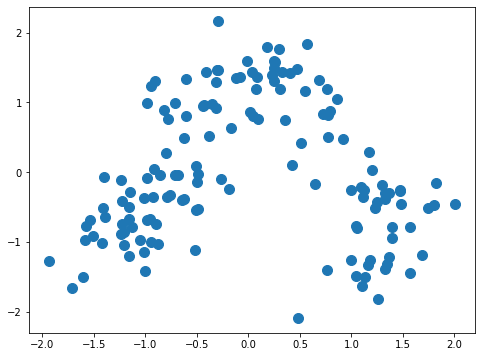

In [86]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reducted[:, 0], X_reducted[:, 1], s=100)

In [87]:
# b) zastosowanie Kmeans (cały dataset):

In [88]:
# korzystając z metody "Elbow" wyznacz najlepszą liczbę n_clusters (wykorzystaj for loop, np range(1,11)) 
# ->wykres (km.inertia_ vs n_clusters)

In [89]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

C:\Users\48502\miniconda3\envs\data_prep_ml\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Distortion')

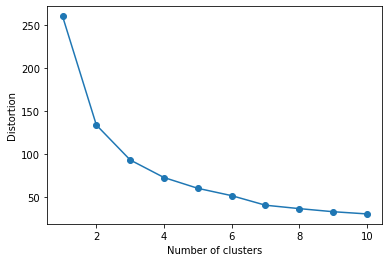

In [90]:
distortions = []
K = range(1, 11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.plot(K, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

In [91]:
# - korzystając z metryki silhouette_score (wykorzystaj for loop, np range(1,11)), 
# ponownie znajdź najlepszą liczbę n_clusters i porównaj z met. powyżej -> wykres,

Score for cluster: = 2 is: 0.6568536504294317
Score for cluster: = 3 is: 0.5711381937868837
Score for cluster: = 4 is: 0.5620323449580342
Score for cluster: = 5 is: 0.5489993239795675
Score for cluster: = 6 is: 0.5656413100386369
Score for cluster: = 7 is: 0.5616196384056884
Score for cluster: = 8 is: 0.5406824747857603
Score for cluster: = 9 is: 0.5316577207122215


Text(0, 0.5, 'Silhouette Score')

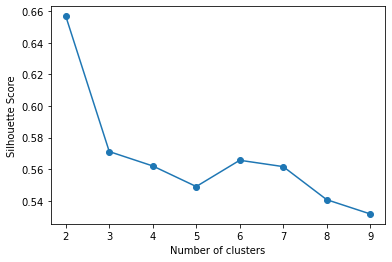

In [92]:
range_n_clusters = list(range(2, 10))
silhouette_score = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=seed)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_score.append(silhouette_avg)
    print("Score for cluster: =", n_clusters,
          "is:", silhouette_avg)
    
plt.plot(range_n_clusters, silhouette_score, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

In [93]:
km_cls = KMeans(
    n_clusters=2,
    init='random',
    n_init=10,
    max_iter=300,
    random_state=seed
)

y_km = km_cls.fit_predict(X_reducted)
km_cls.cluster_centers_

array([[-0.497221  ,  0.29047841],
       [ 1.26791356, -0.74071995]])

In [94]:
# - utwórz wykres typu "scatter", nadając każdemu punktowi kolor zgodny z danym klastrem

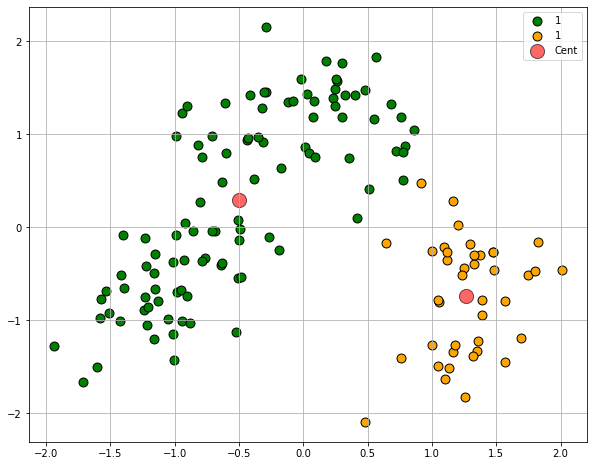

In [95]:
plt.figure(figsize=(10, 8))

plt.scatter(
    X_reducted[y_km == 0, 0],
    X_reducted[y_km == 0, 1],
    c='green', edgecolor='black',
    label='1', s=80
)

plt.scatter(
    X_reducted[y_km == 1, 0],
    X_reducted[y_km == 1, 1],
    c='orange', edgecolor='black',
    label='1', s=80
)

plt.scatter(
    km_cls.cluster_centers_[:, 0],
    km_cls.cluster_centers_[:, 1],
    c='r', marker="o", s=200, alpha=0.6,
    edgecolor="black", label='Cent'
)

plt.legend()
plt.grid()

In [96]:
# - wyznacz wartość accuracy, porównując numer klastra (wartość y_pred) z kolumną "target" ('y')

In [97]:
# - w algorytmie KMeans zmień init='random' na init='k-means++' i porównaj wyniki accuracy.

In [98]:
init_list = ["random", "k-means++"]

for i in init_list:
    model = KMeans(
        n_clusters=2,
        init=i,
        n_init=10,
        max_iter=300,
        random_state=seed
    ) 
        
    model.fit(X, y)
    pred = model.predict(X)
    print(f"Kmeans with init= {i}. ACC: {accuracy_score(y, pred)}")

Kmeans with init= random. ACC: 0.6573033707865169
Kmeans with init= k-means++. ACC: 0.07303370786516854


In [99]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 4


Text(0.5, 1.0, 'Estimated number of clusters: 4')

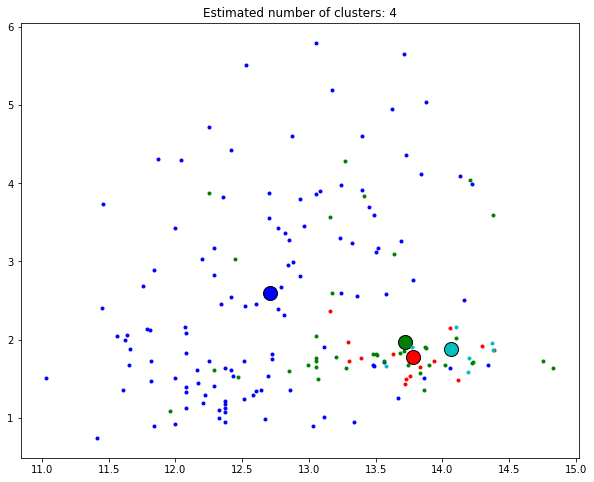

In [100]:
plt.figure(figsize=(10, 8))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)